In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
sns.set(style="whitegrid", palette="muted", font_scale=1.2)
plt.rcParams["figure.figsize"] = (10, 6)

In [10]:
ev = pd.read_csv(r"data\preprocessed\ev_battery_health_preprocessed.csv")
traffic = pd.read_csv(r"data\preprocessed\traffic_preprocessed.csv")
weather = pd.read_csv(r"data\preprocessed\weatherHistory_preprocessed.csv")

In [11]:
print("EV Dataset Shape:", ev.shape)
print("Traffic Dataset Shape:", traffic.shape)
print("Weather Dataset Shape:", weather.shape)

print("\nEV Dataset Preview:\n", ev.head())
print("\nTraffic Dataset Preview:\n", traffic.head())
print("\nWeather Dataset Preview:\n", weather.head())

EV Dataset Shape: (10000, 8)
Traffic Dataset Shape: (48120, 4)
Weather Dataset Shape: (96453, 12)

EV Dataset Preview:
    total_distance_km  average_trip_speed_kmph  ambient_temperature_C  \
0               0.37                     0.37                   0.73   
1               0.95                     0.33                   0.18   
2               0.73                     0.18                   0.35   
3               0.60                     0.61                   0.66   
4               0.16                     0.48                   0.48   

   trip_duration_min  charging_cycles  fast_charging_ratio_%  \
0               0.64             0.30                   0.23   
1               0.46             0.86                   0.58   
2               0.96             0.66                   0.39   
3               0.22             0.53                   0.47   
4               0.59             0.09                   0.02   

   average_battery_temperature_C  battery_health_%  
0        

In [12]:
print("\nEV Dataset Description:\n", ev.describe())
print("\nTraffic Dataset Description:\n", traffic.describe())
print("\nWeather Dataset Description:\n", weather.describe())


EV Dataset Description:
        total_distance_km  average_trip_speed_kmph  ambient_temperature_C  \
count       10000.000000             10000.000000           10000.000000   
mean            0.494311                 0.504372               0.500050   
std             0.287754                 0.289331               0.286821   
min             0.000000                 0.000000               0.000000   
25%             0.250000                 0.250000               0.250000   
50%             0.490000                 0.510000               0.500000   
75%             0.740000                 0.760000               0.740000   
max             1.000000                 1.000000               1.000000   

       trip_duration_min  charging_cycles  fast_charging_ratio_%  \
count       10000.000000     10000.000000           10000.000000   
mean            0.498859         0.433505               0.319473   
std             0.289041         0.276132               0.178123   
min             0

In [13]:
print("\nMissing Values (EV):\n", ev.isnull().sum())
print("\nMissing Values (Traffic):\n", traffic.isnull().sum())
print("\nMissing Values (Weather):\n", weather.isnull().sum())


Missing Values (EV):
 total_distance_km                0
average_trip_speed_kmph          0
ambient_temperature_C            0
trip_duration_min                0
charging_cycles                  0
fast_charging_ratio_%            0
average_battery_temperature_C    0
battery_health_%                 0
dtype: int64

Missing Values (Traffic):
 DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

Missing Values (Weather):
 Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


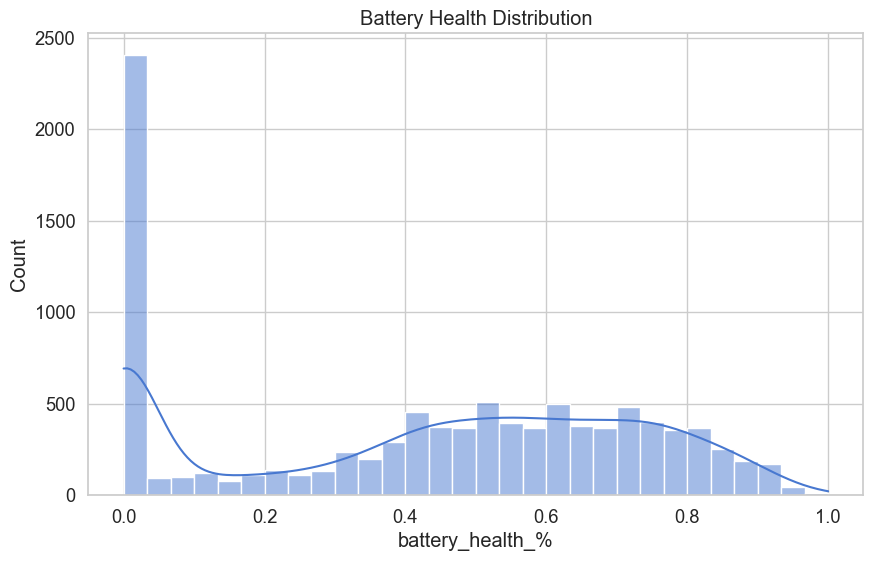

In [14]:
sns.histplot(ev['battery_health_%'], kde=True, bins=30)
plt.title("Battery Health Distribution")
plt.show()

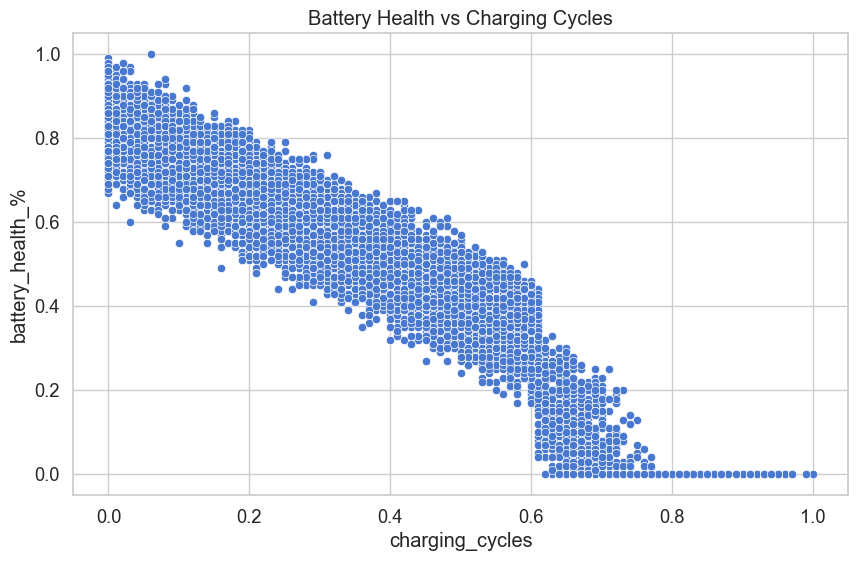

In [15]:
sns.scatterplot(x="charging_cycles", y="battery_health_%", data=ev)
plt.title("Battery Health vs Charging Cycles")
plt.show()

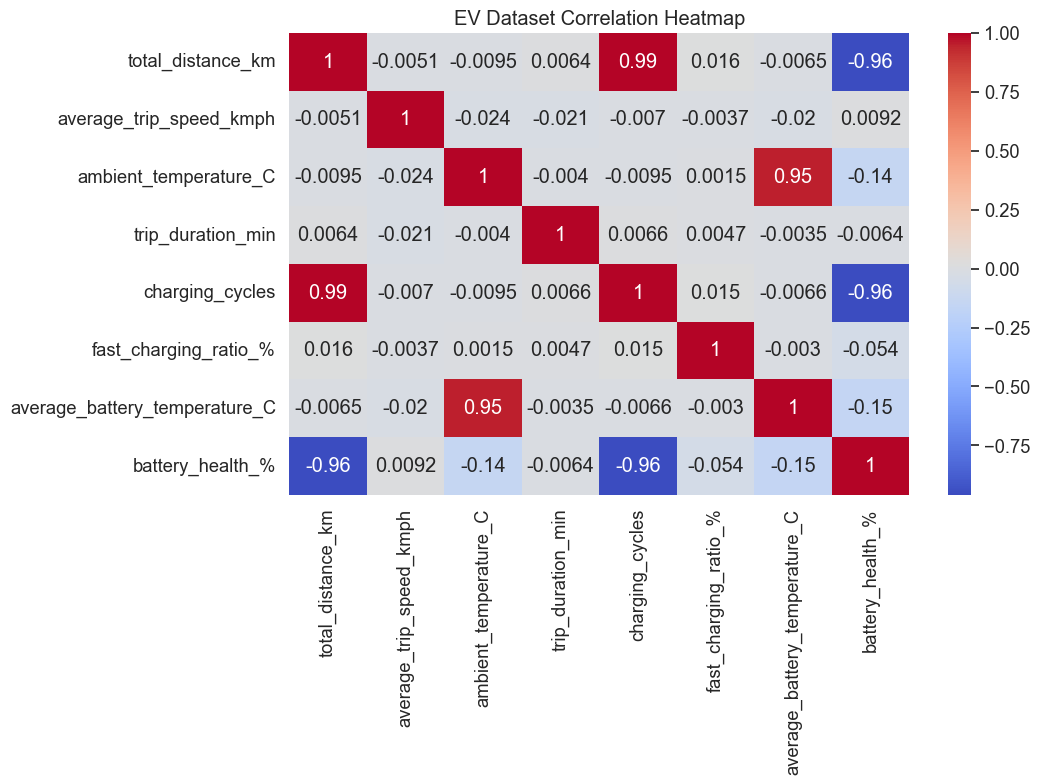

In [16]:
sns.heatmap(ev.corr(), annot=True, cmap="coolwarm")
plt.title("EV Dataset Correlation Heatmap")
plt.show()

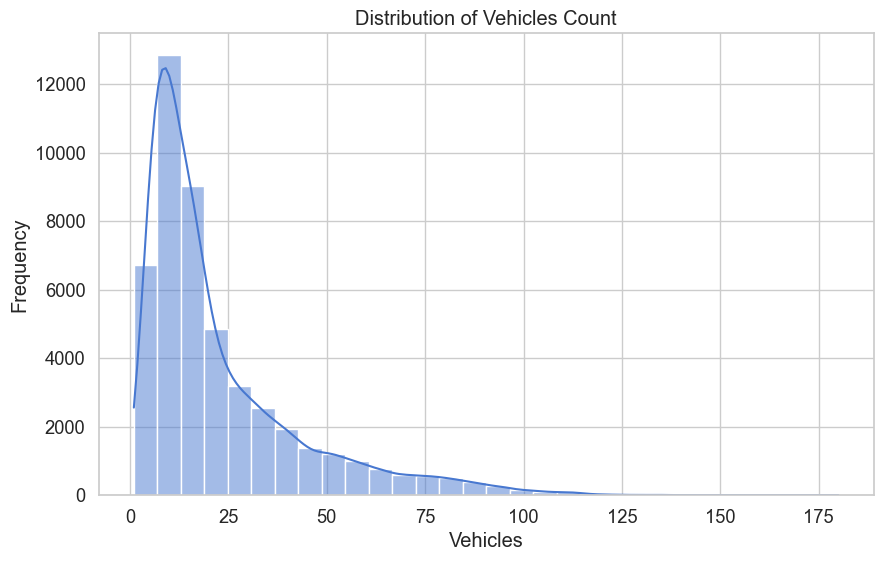

In [18]:
sns.histplot(traffic['Vehicles'], bins=30, kde=True)
plt.title("Distribution of Vehicles Count")
plt.xlabel("Vehicles")
plt.ylabel("Frequency")
plt.show()

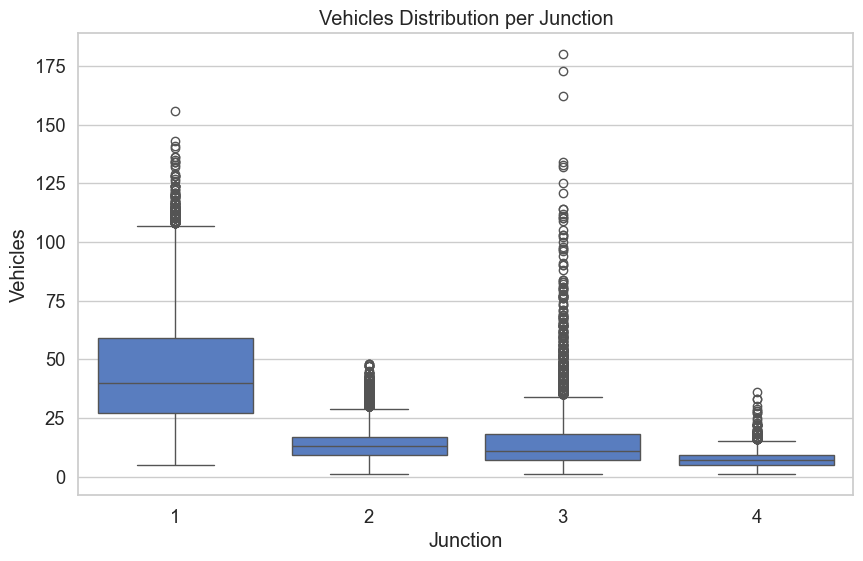

In [19]:
sns.boxplot(x="Junction", y="Vehicles", data=traffic)
plt.title("Vehicles Distribution per Junction")
plt.show()

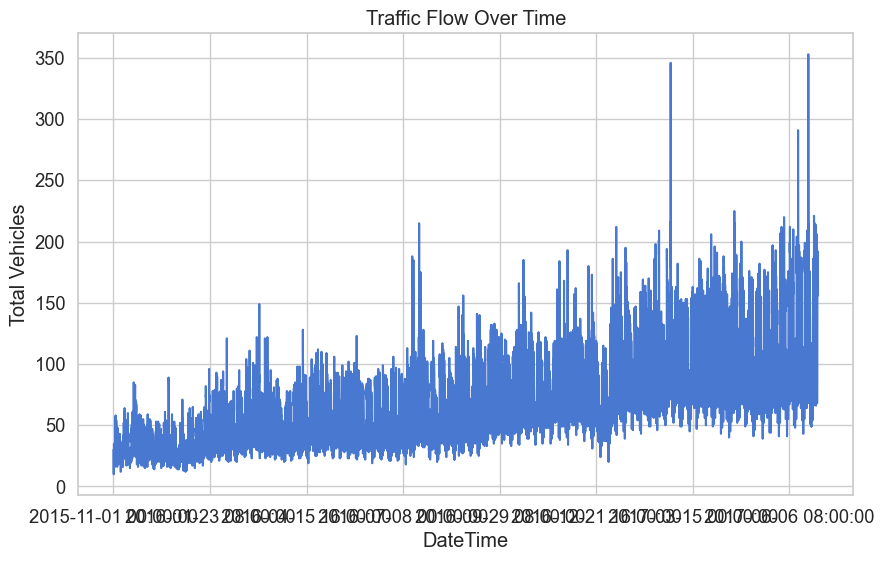

In [20]:
traffic.groupby("DateTime")["Vehicles"].sum().plot()
plt.title("Traffic Flow Over Time")
plt.ylabel("Total Vehicles")
plt.xlabel("DateTime")
plt.show()

In [ ]:
traffic['DateTime'] = pd.to_datetime(traffic['DateTime'], errors='coerce')
traffic['Date'] = traffic['DateTime'].dt.date
traffic['Hour'] = traffic['DateTime'].dt.hour
traffic['DayOfWeek'] = traffic['DateTime'].dt.day_name()

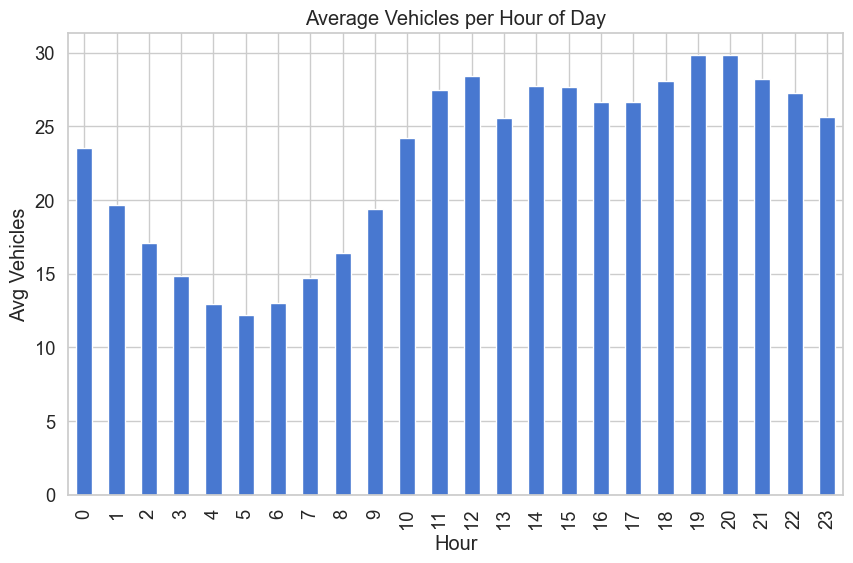

In [25]:
hourly_avg = traffic.groupby("Hour")["Vehicles"].mean()
hourly_avg.plot(kind="bar")
plt.title("Average Vehicles per Hour of Day")
plt.ylabel("Avg Vehicles")
plt.xlabel("Hour")
plt.show()

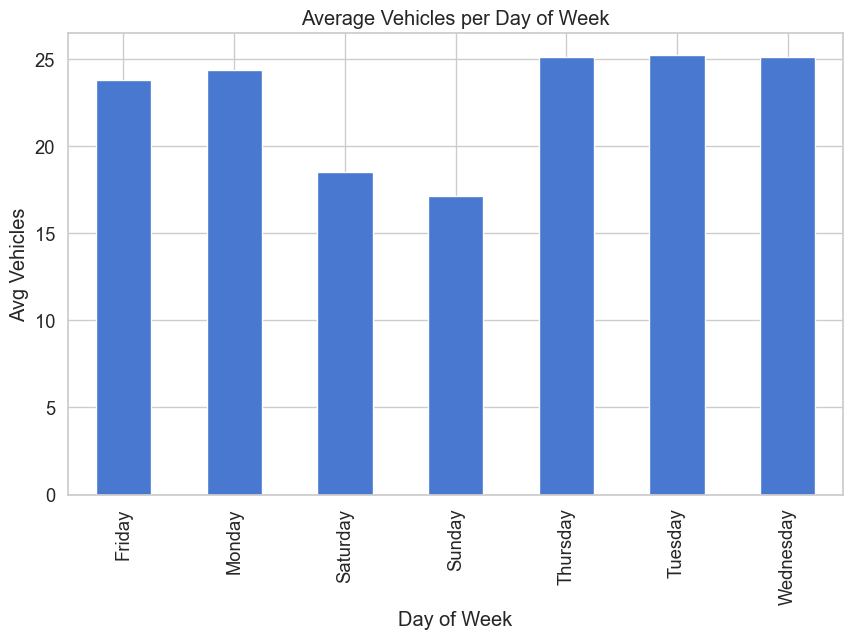

In [26]:
dow_avg = traffic.groupby("DayOfWeek")["Vehicles"].mean()
dow_avg.plot(kind="bar")
plt.title("Average Vehicles per Day of Week")
plt.ylabel("Avg Vehicles")
plt.xlabel("Day of Week")
plt.show()

In [28]:
if 'Loud Cover' in weather.columns:
    weather = weather.rename(columns={'Loud Cover': 'Cloud Cover'})

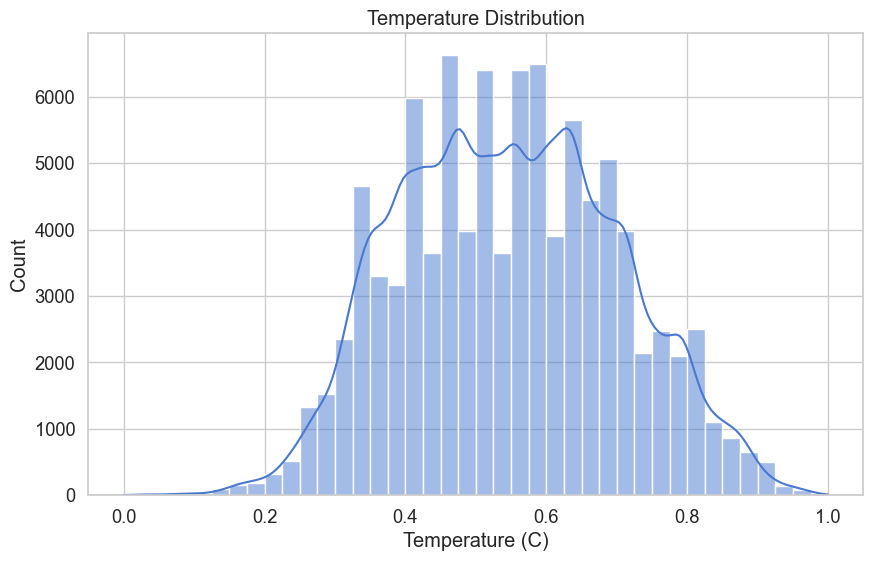

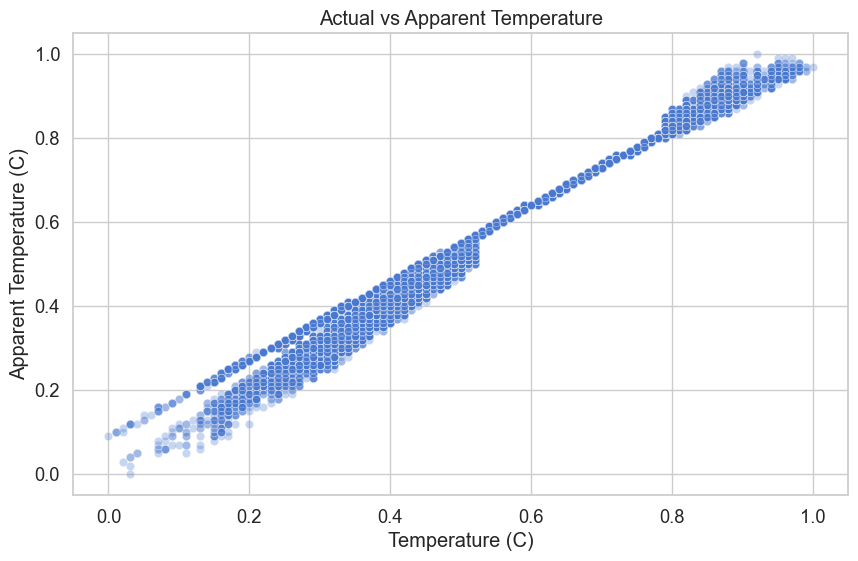

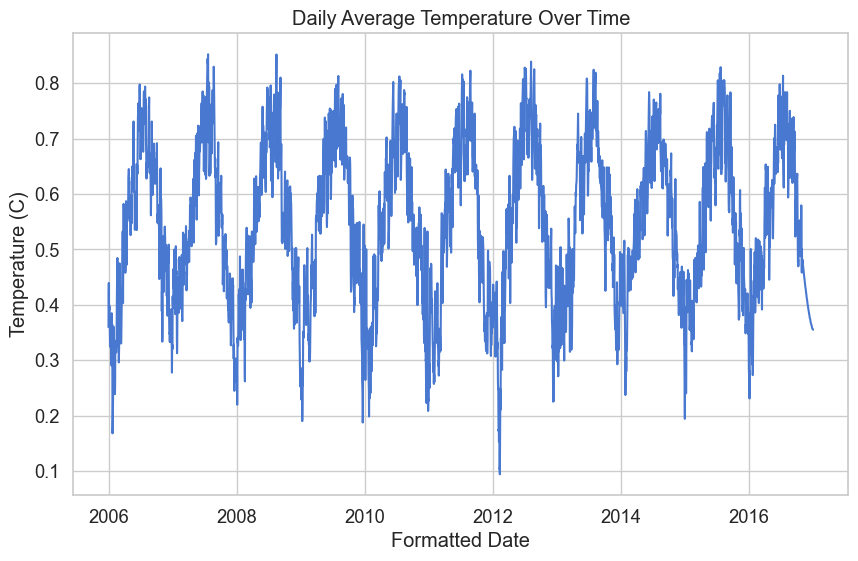

In [30]:
# Temperature distribution
sns.histplot(weather['Temperature (C)'], kde=True, bins=40)
plt.title("Temperature Distribution")
plt.show()

# Actual vs Apparent Temperature
sns.scatterplot(x="Temperature (C)", y="Apparent Temperature (C)", data=weather, alpha=0.3)
plt.title("Actual vs Apparent Temperature")
plt.show()

# Daily Avg Temperature Trend
weather['Formatted Date'] = pd.to_datetime(weather['Formatted Date'], errors='coerce')
daily_temp = weather.groupby(weather['Formatted Date'].dt.date)['Temperature (C)'].mean()
daily_temp.plot()
plt.title("Daily Average Temperature Over Time")
plt.ylabel("Temperature (C)")
plt.show()


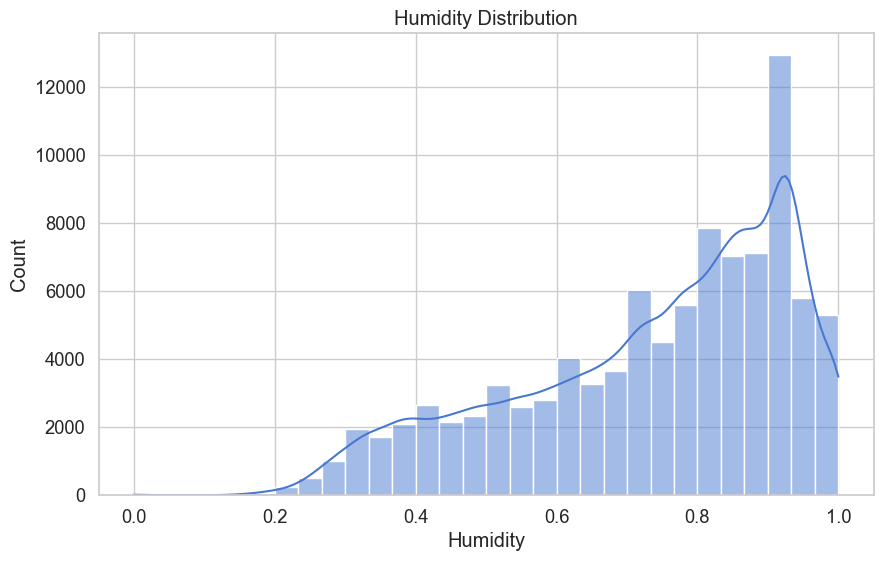

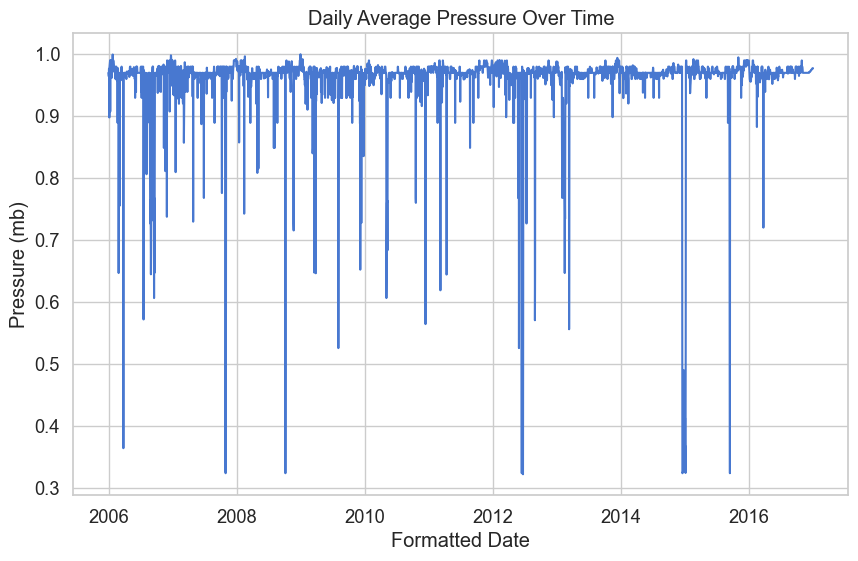

In [ ]:

sns.histplot(weather['Humidity'], bins=30, kde=True)
plt.title("Humidity Distribution")
plt.show()
weather.groupby(weather['Formatted Date'].dt.date)['Pressure (millibars)'].mean().plot()
plt.title("Daily Average Pressure Over Time")
plt.ylabel("Pressure (mb)")
plt.show()


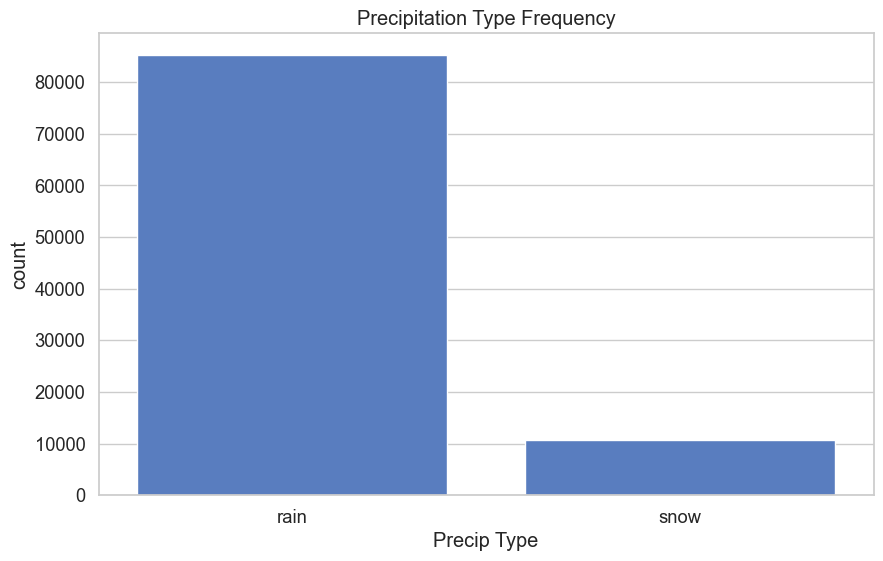

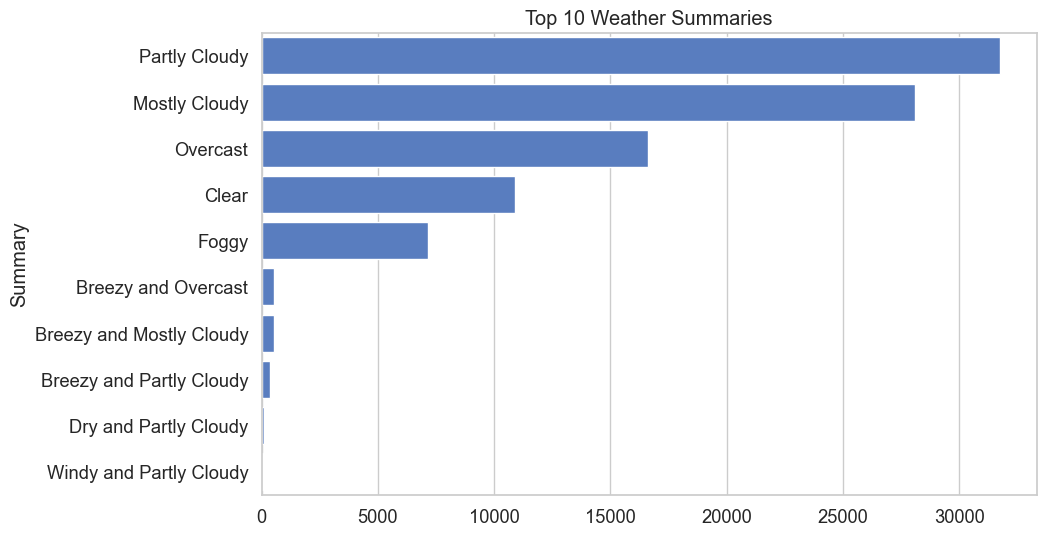

In [41]:
# Precipitation type frequency
sns.countplot(x="Precip Type", data=weather)
plt.title("Precipitation Type Frequency")
plt.show()

# Weather Summary
top_summaries = weather['Summary'].value_counts().nlargest(10)
sns.barplot(x=top_summaries.values, y=top_summaries.index)
plt.title("Top 10 Weather Summaries")
plt.show()


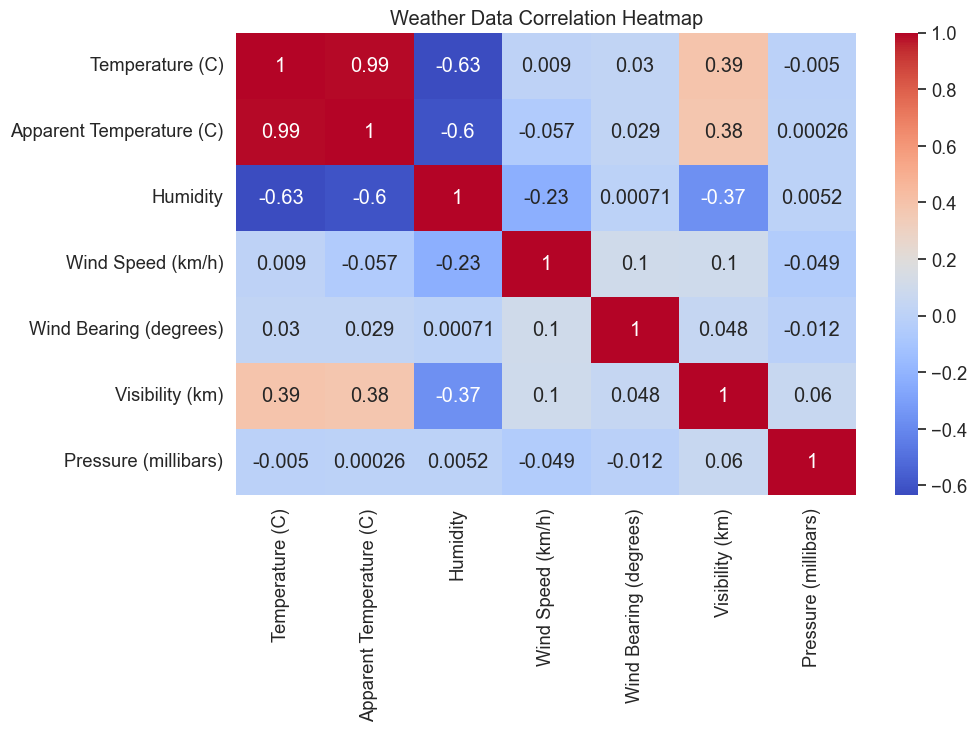

In [39]:
numeric_weather = weather.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_weather.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Weather Data Correlation Heatmap")
plt.show()
